Reference: https://github.com/enakai00/jupyter_tfbook

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

$$ f(x_1, x_2) = w_0 + w_1 x_1 + w_2 x_2 = 0 $$

Sigmoid function

$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

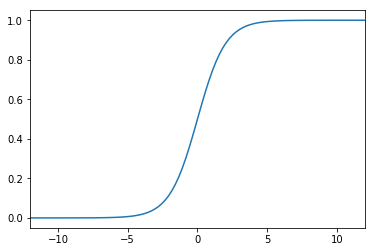

In [10]:
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xlim(-12, 12)
x = np.linspace(-12, 12, 100)
y = 1/(1 + np.exp(-x))
subplot.plot(x, y)

$$ P(x_1, x_2) = \sigma(f(x_1, x_2)) $$

$$ P = \prod_{n=1}^{N} \bigl\{P(x_{1n},x_{2n})\bigr\}^{t_n} \bigl\{1 - P(x_{1n},x_{2n})\bigr\}^{1-t_n} $$

$$ E = -\log P $$

$$ \log ab = \log a + \log b, \log a~n = n \log a $$

Error function

$$ E = -\log \prod_{n=1}^{N} \bigl\{P(x_{1n},x_{2n})\bigr\}^{t_n} \bigl\{1 - P(x_{1n},x_{2n})\bigr\}^{1-t_n}
= -\sum_{n=1}^{N} \bigl[ t_n \log P(x_{1n},x_{2n}) + (1 - t_n)\log \bigl\{1 - P(x_{1n},x_{2n}) \bigr\} \bigr] 
$$



In [16]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal, permutation
from pandas import DataFrame, Series

In [17]:
np.random.seed(20180729)

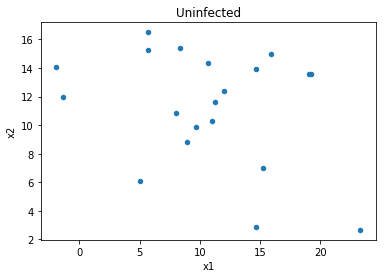

In [38]:
n0 , mu0, variance0 = 20, [10, 11], 20
data0 = multivariate_normal(mu0, np.eye(2)*variance0, n0)
df0 = DataFrame(data0, columns=['x1', 'x2'])
df0.plot(x='x1', y='x2', kind='scatter', title='Uninfected')
df0['t'] = 0

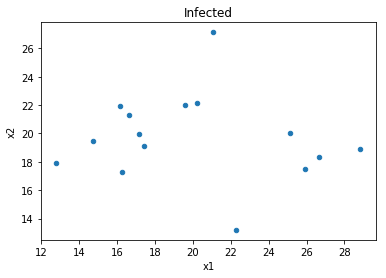

In [47]:
n1 , mu1, variance1 = 15, [18, 20], 22
data1 = multivariate_normal(mu1, np.eye(2)*variance1, n1)
df1 = DataFrame(data1, columns=['x1', 'x2'])
df1.plot(x='x1', y='x2', kind='scatter', title='Infected')
df1['t'] = 1

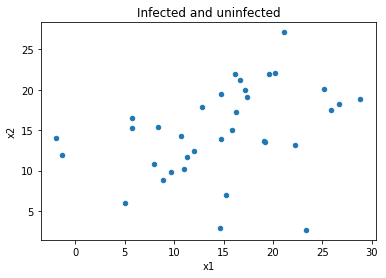

In [48]:
df = pd.concat([df0, df1], ignore_index=True)
df.plot(x='x1', y='x2', kind='scatter', title='Infected and uninfected')

In [52]:
print(permutation(df.index))

[26 31  0  5 17 27 18 29 30 20 24 15  1 23 34  6 16  2 11  3  8 22 10 32
 28 21  4 33  9 12 13  7 14 25 19]


In [49]:
train_set = df.reindex(permutation(df.index)).reset_index(drop=True)
print(train_set)

           x1         x2  t
0   11.024974  10.256240  0
1   12.044851  12.375588  0
2    7.986231  10.846008  0
3   12.783201  17.919411  1
4   19.228689  13.549953  0
5   20.214254  22.140160  1
6   14.696573  13.914980  0
7    9.686677   9.883956  0
8   19.605463  21.983797  1
9   21.069037  27.125923  1
10   5.714602  15.240788  0
11  -1.346491  11.955372  0
12  22.254067  13.208811  1
13  19.074960  13.611765  0
14  23.334781   2.673565  0
15  -1.919743  14.088964  0
16  16.151117  21.926742  1
17  11.259463  11.641380  0
18  16.615825  21.276690  1
19  28.847456  18.930668  1
20   8.905565   8.846600  0
21  15.879464  14.971636  0
22  26.668397  18.310878  1
23  25.137430  20.051493  1
24  10.699344  14.339804  0
25  25.909789  17.459258  1
26  16.270965  17.260027  1
27  15.280523   6.971627  0
28   5.713623  16.490557  0
29  17.402711  19.121346  1
30  14.719227  19.461620  1
31   8.365401  15.426883  0
32  14.661279   2.865207  0
33  17.169364  19.984988  1
34   5.030702   6.05

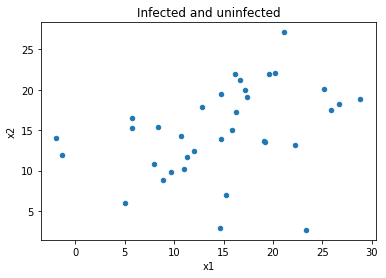

In [53]:
df.plot(x='x1', y='x2', kind='scatter', title='Infected and uninfected')